In [1]:
#load training sets from .mat file

#to import .mat file
import scipy.io as si
import numpy as np
from scipy.special import expit
import random #to generate random numbers
import matplotlib.pyplot as plt

#.mat file has two matrix X (5000*400) and y(5000*1)
File = si.loadmat('ex4data1.mat')

#load parameters
all_theta =  si.loadmat('ex4weights.mat')

#load input_layer
input_layer = np.array(File['X'])
input_layer = np.insert(input_layer,0,1,axis = 1)


#sigmoid function implementation
def sigmoid_function(z):
          return expit(z)
    
#implement Forward Propagation
def compute_input_layer(theta1,input_layer):
    return (sigmoid_function(np.dot(input_layer,theta1.T)))

[   0  200  400  600  800 1000 1200 1400 1600 1800 2000 2200 2400 2600 2800
 3000 3200 3400 3600 3800 4000 4200 4400 4600 4800]


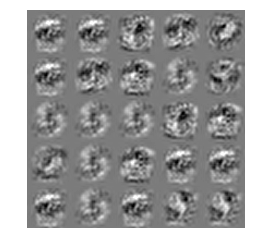

In [3]:
#plot data
#create array to store 25 images with 20*20 pixels of each image
display = np.zeros((100,100))

#select randomly 25 numbers
selected = np.array(range(0,5000,200))
print(selected)

rows = 0
cols = 0

for data in selected:
    #create matrix of image from selected training data-sets
    
    #compute hidden layer for ith training set
    hidden_layer = compute_input_layer(all_theta['Theta1'],input_layer[data])
    activated_unit = np.argmax(hidden_layer)
    
    #get matrix of corresponding theta1 for which activated unit has highest probability
    act_matrix = all_theta['Theta1'][activated_unit].reshape(1,401)
    #remove bias unit
    act_matrix = np.delete(act_matrix,0,1)
    
    
    #Transpose the data to get a straight image
    temp = act_matrix.reshape(20,20).T
    
    #check if the first row of display array is filled or not
    if cols == 5:
        cols = 0
        rows += 1
    
    #copy data of temp into display array
    display[rows*20:rows*20+20,cols*20:cols*20+20] = temp
    cols += 1

#plot display as images
plt.axis('off')
plt.imshow(display,cmap='gray',interpolation = 'sinc')